In [35]:
%%bash
gdown 1LIRkum4Lnn7ZdToKjnls-bd0MBjPqWmU

Downloading...
From: https://drive.google.com/uc?id=1LIRkum4Lnn7ZdToKjnls-bd0MBjPqWmU
To: /content/ads.csv
100%|██████████| 4.76k/4.76k [00:00<00:00, 10.5MB/s]


In [36]:
import pandas as pd
df=pd.read_csv('ads.csv')
df.sample(3)

,Unnamed: 0,TV,radio,newspaper,sales
14,15,204.1,32.9,46.0,19.0
153,154,171.3,39.7,37.7,19.0
58,59,210.8,49.6,37.7,23.8


In [37]:
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [39]:
df.isna().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [40]:
df.corr()

,Unnamed: 0,TV,radio,newspaper,sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
radio,-0.110680,0.054809,1.000000,0.354104,0.576223
newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
sales,-0.051616,0.782224,0.576223,0.228299,1.000000


<Axes: >

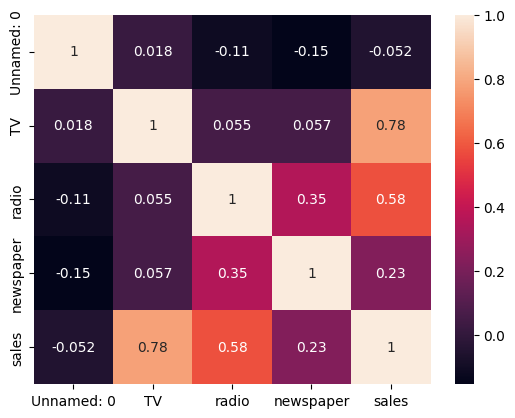

In [41]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True)

In [42]:
# Sales is the dependent variable in this case and other are considered as independent variable
# since TV and radio have  the most corelation with sales and both have positive corelation , we pick TV

In [43]:
X=df.loc[:,["TV"]]
X
y=df.sales

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

In [45]:
X_train.shape,y_train.shape

((160, 1), (160,))

In [46]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [47]:
y_pred=model.predict(X_test)
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
MSE = mean_squared_error(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)
r2_score = r2_score(y_test, y_pred)
print(f"MSE = {MSE}")
print(f"MAE = {MAE}")
print(f"r2_score = {r2_score}")

MSE = 11.688668910369447
MAE = 2.578910561044354
r2_score = 0.5747439963247203


# Let us check the error status by using both tv and radio as independent variable

In [48]:
S=df.loc[:,["TV","radio"]]
X
M=df.sales

In [49]:
from sklearn.model_selection import train_test_split
S_train, S_test, M_train, M_test = train_test_split(S, M, test_size=0.2, random_state=40)

In [50]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(S_train,M_train)

LinearRegression()

In [51]:
M_pred=model.predict(S_test)
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
MSE = mean_squared_error(M_test, M_pred)
MAE = mean_absolute_error(M_test, M_pred)
r2_score = r2_score(M_test, M_pred)
print(f"MSE = {MSE}")
print(f"MAE = {MAE}")
print(f"r2_score = {r2_score}")

MSE = 5.523065742358094
MAE = 1.5790853977220023
r2_score = 0.799060364901994


In [52]:
# We came to know that by using both TV and Radio for analysis the prediction was more accurate

# For the last task lets use Tv,newspaper and radio as independent variable

In [53]:
R=df.loc[:,["radio","newspaper","TV"]]
A=df.sales

In [54]:
from sklearn.model_selection import train_test_split
R_train, R_test, A_train, A_test = train_test_split(R, A, test_size=0.2, random_state=40)

In [55]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(R_train,A_train)
A_pred=model.predict(R_test)
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
MSE = mean_squared_error(A_test, A_pred)
MAE = mean_absolute_error(A_test, A_pred)
r2_score = r2_score(A_test, A_pred)
print(f"MSE = {MSE}")
print(f"MAE = {MAE}")
print(f"r2_score = {r2_score}")

MSE = 5.544921079243524
MAE = 1.5795751064324317
r2_score = 0.7982652261831078


In [56]:
sales=model.predict([[200,30,40]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [57]:
sales[0]

43.93790192036876